<a href="https://colab.research.google.com/github/valeriafigueredo-data/modelos_descritivos/blob/main/2.%20Hands_On_3_dendograma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Modelos descritivos**


Professor: Matheus Soares de Lacerda

Sala: 01

Alunos:

* Arthur Wanderley Ferreira dos Santos
* André Felipe Bezerra de Souza Leão
* Manuela de Lacerda Bezerra Carvalho
* Valéria Cristina Andrade Rodrigues de Figueredo
* Thiago Wanderley Amorim

O objetivo do presente trabalho é realizar análises de clusters em um conjunto de dados de clientes. Será gerado e analisado dendogramas de clientes em grupos com base em seu gênero, idade, renda anual e pontuação de gastos.

In [ ]:
import pandas as pd
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, single, average, fcluster
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/devjaynemorais/modelos_descritivos_curso/main/Aula%2002/dados/mall_customers.csv')

##Análise exploratória

In [ ]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.set_index('CustomerID', inplace=True)

<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

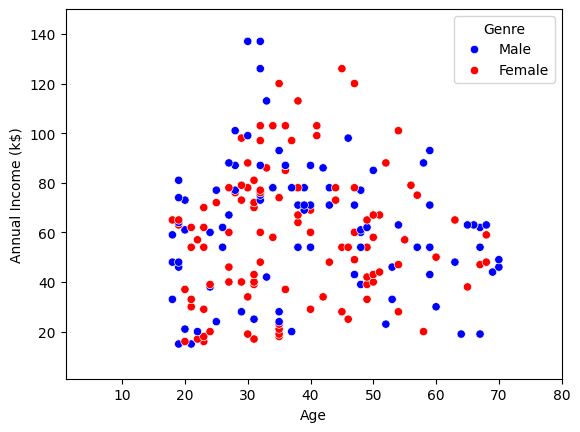

In [ ]:
palette = {'Female': 'red', 'Male': 'blue'}

ax = sns.scatterplot(x='Age', y='Annual Income (k$)', hue='Genre', data=df, palette=palette)

ax.set_xlim(1, 80)
ax.set_ylim(1, 150)
ax

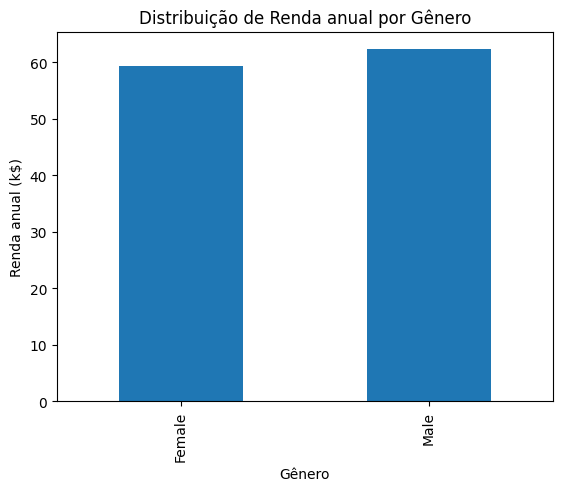

In [ ]:
grouped_df = df.groupby('Genre').mean().reset_index()

grouped_df.set_index('Genre', inplace=True)

# Filtrando apenas a coluna 'Annual Income (k$)'
salary_df = grouped_df[['Annual Income (k$)']]

# Plotando o gráfico de barras apenas para o salário
salary_df.plot(kind='bar', legend=False)

plt.title('Distribuição de Renda anual por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Renda anual (k$)')

plt.show()

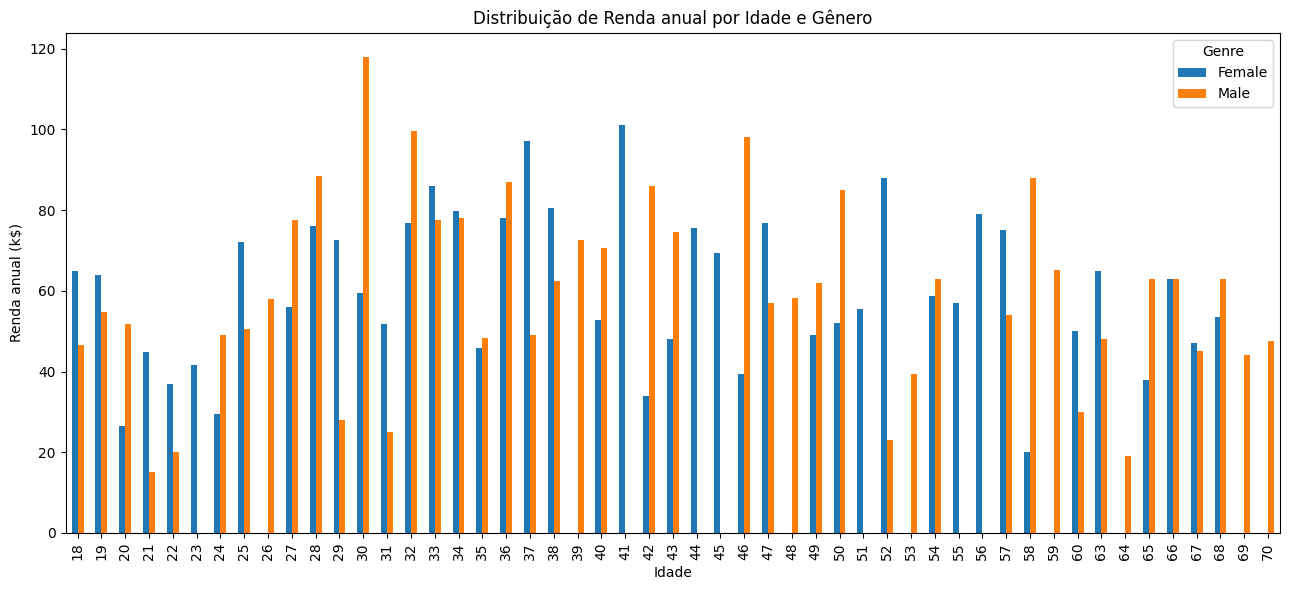

In [ ]:
# Agrupando por idade e gênero e calculando a soma das métricas
grouped_df = df.groupby(['Age', 'Genre']).mean().reset_index()

# Pivotando os dados para que o gênero seja uma categoria dentro de cada grupo de idade
pivot_df = grouped_df.pivot(index='Age', columns='Genre', values='Annual Income (k$)')

# Plotando o gráfico de barras com o gênero no eixo x
pivot_df.plot(kind='bar', figsize=(13, 6))

plt.title('Distribuição de Renda anual por Idade e Gênero')
plt.xlabel('Idade')
plt.ylabel('Renda anual (k$)')

# Ajusta o layout para garantir que tudo esteja visível
plt.tight_layout()

plt.show()

##Dendograma

###Annual Income (k$) e Spending Score (1-100)

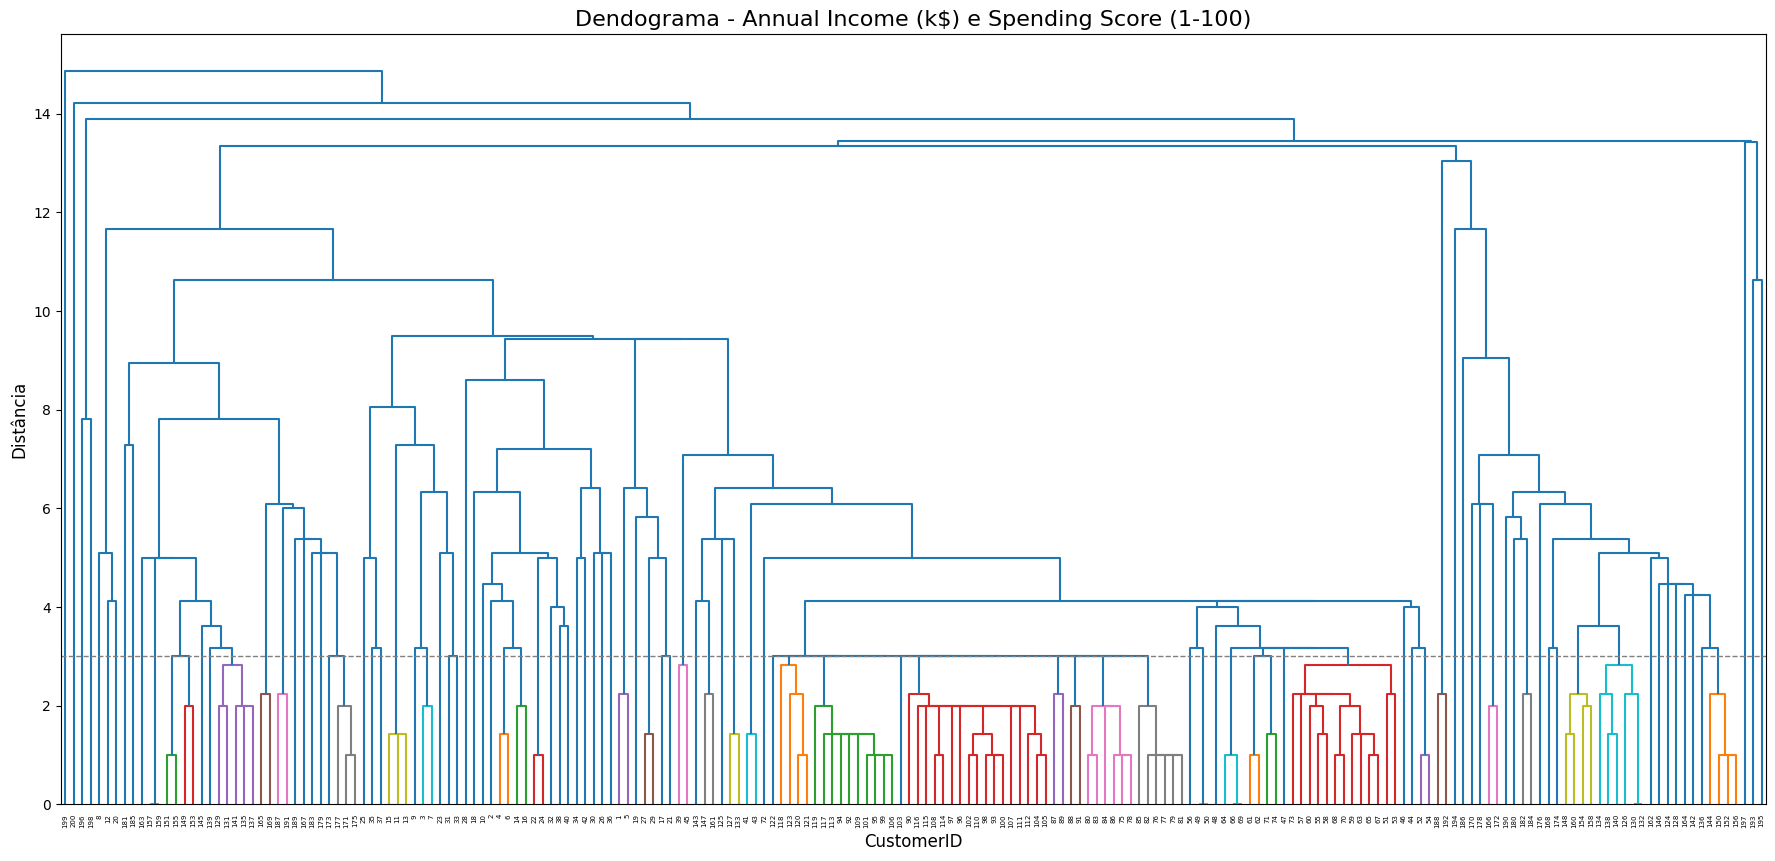

In [ ]:
plt.figure(figsize=(22,10))
# Calculate the distance entre cada amostra
Z1 = single(df[['Annual Income (k$)', 'Spending Score (1-100)']])
tr1 = 3
# Control number of clusters in the plot + add horizontal line.
dendrogram(Z1, color_threshold=tr1, labels=df.index)
plt.axhline(y=tr1, c='grey', lw=1, linestyle='dashed')
plt.xlabel('CustomerID', fontsize=12)
plt.ylabel('Distância', fontsize=12)
plt.title('Dendograma - Annual Income (k$) e Spending Score (1-100)', fontsize=16)

# Show the graph
plt.show()

In [ ]:
clusters1 = fcluster(Z1, t=tr1, criterion='distance')
clusters1

array([44, 31, 25, 29, 44, 29, 25,  5, 26, 32, 24,  3, 24, 30, 24, 30, 46,
       37, 47,  4, 46, 33, 28, 33, 23, 40, 45, 43, 45, 42, 27, 36, 27, 38,
       21, 41, 22, 34, 48, 35, 53, 39, 53, 63, 48, 64, 60, 61, 55, 55, 59,
       62, 59, 62, 59, 56, 59, 59, 59, 59, 58, 58, 59, 57, 59, 57, 59, 59,
       57, 59, 58, 65, 59, 58, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54,
       54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54,
       54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54,
       54, 54, 54, 54, 82, 52, 76, 51, 81, 10, 76, 10, 76, 51, 76, 10, 78,
       10, 76, 11, 76, 10, 79, 50, 77, 12, 83, 49, 75,  9, 77,  9, 77,  9,
       75,  9, 77,  8, 75,  8, 75, 49, 84, 13, 80, 14, 67, 19, 73, 14, 69,
       16, 67, 16, 74, 16, 85, 16, 68, 17, 71,  6, 70, 18, 70,  7, 86, 15,
       66, 20, 72, 15, 66, 88, 87, 89,  1, 90,  2, 92, 91], dtype=int32)

In [ ]:
clusters1.max()

92

Nessa análise foram gerados 92 clusters.

In [ ]:
df['cluster_id_1'] = clusters1
df.head(10)

,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster_id_1
CustomerID,,,,,
1,Male,19,15,39,44
2,Male,21,15,81,31
3,Female,20,16,6,25
4,Female,23,16,77,29
5,Female,31,17,40,44
6,Female,22,17,76,29
7,Female,35,18,6,25
8,Female,23,18,94,5
9,Male,64,19,3,26


###Age e Annual Income (k$)

**Single**

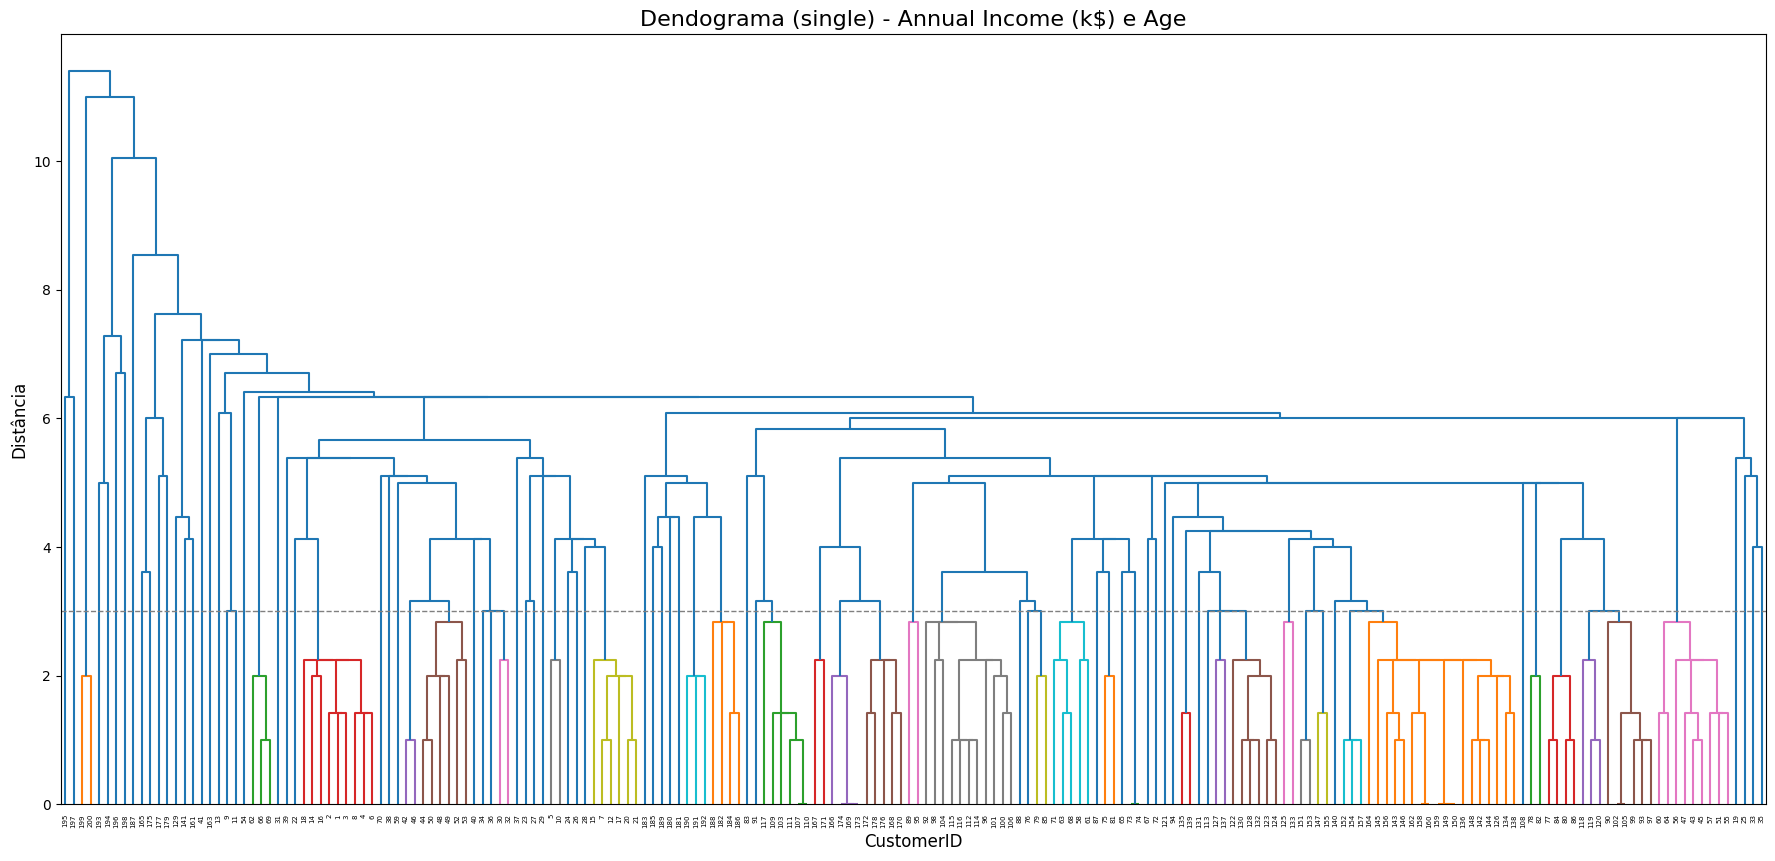

In [ ]:
plt.figure(figsize=(22,10))
# Calculate the distance entre cada amostra
Z = single(df[['Age', 'Annual Income (k$)']])
tr = 3
# Control number of clusters in the plot + add horizontal line.
dendrogram(Z, color_threshold=tr, labels=df.index)
plt.axhline(y=tr, c='grey', lw=1, linestyle='dashed')
plt.xlabel('CustomerID', fontsize=12)
plt.ylabel('Distância', fontsize=12)
plt.title('Dendograma (single) - Annual Income (k$) e Age', fontsize=16)

# Show the graph
plt.show()

In [ ]:
clusters = fcluster(Z, t=tr, criterion='distance')
clusters.max()

83

In [ ]:
df['cluster_id_2'] = clusters
df.head(10)

,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster_id_1,cluster_id_2
CustomerID,,,,,,
1,Male,19,15,39,44,18
2,Male,21,15,81,31,18
3,Female,20,16,6,25,18
4,Female,23,16,77,29,18
5,Female,31,17,40,44,30
6,Female,22,17,76,29,18
7,Female,35,18,6,25,33
8,Female,23,18,94,5,18
9,Male,64,19,3,26,15


**Average**

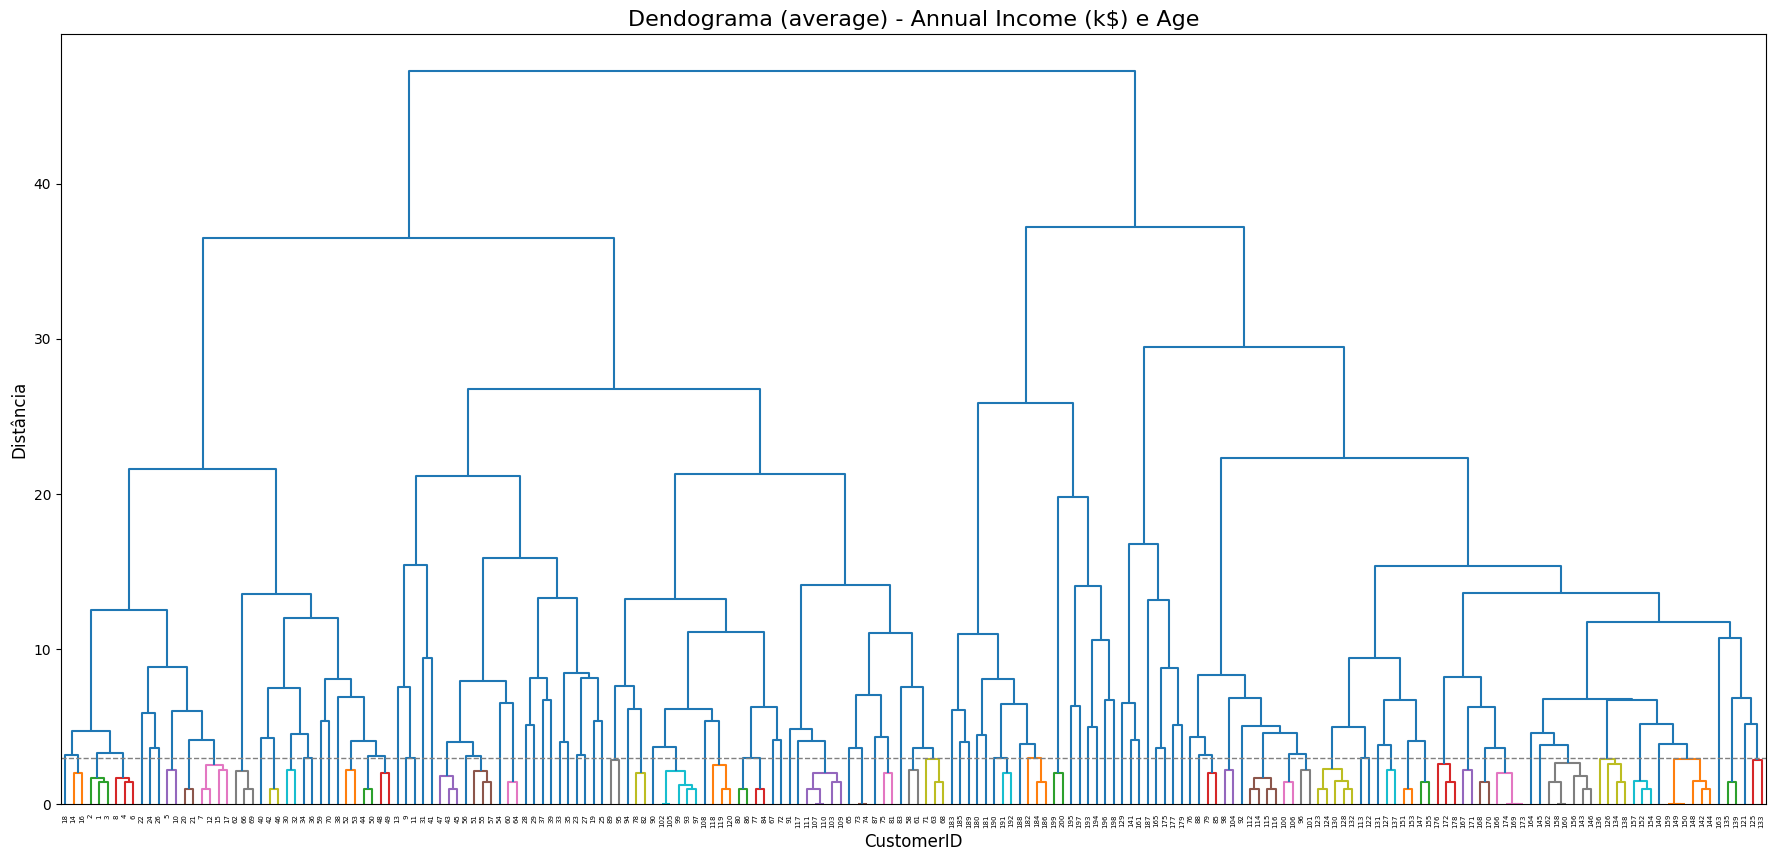

In [ ]:
plt.figure(figsize=(22,10))
# Calculate the distance entre cada amostra
Z2 = average(df[['Age', 'Annual Income (k$)']])
tr2 = 3
# Control number of clusters in the plot + add horizontal line.
dendrogram(Z2, color_threshold=tr2, labels=df.index)
plt.axhline(y=tr2, c='grey', lw=1, linestyle='dashed')
plt.xlabel('CustomerID', fontsize=12)
plt.ylabel('Distância', fontsize=12)
plt.title('Dendograma (average) - Annual Income (k$) e Age', fontsize=16)

# Show the graph
plt.show()

In [ ]:
clusters2 = fcluster(Z2, t=tr2, criterion='distance')
clusters2.max()

112

**Complete**

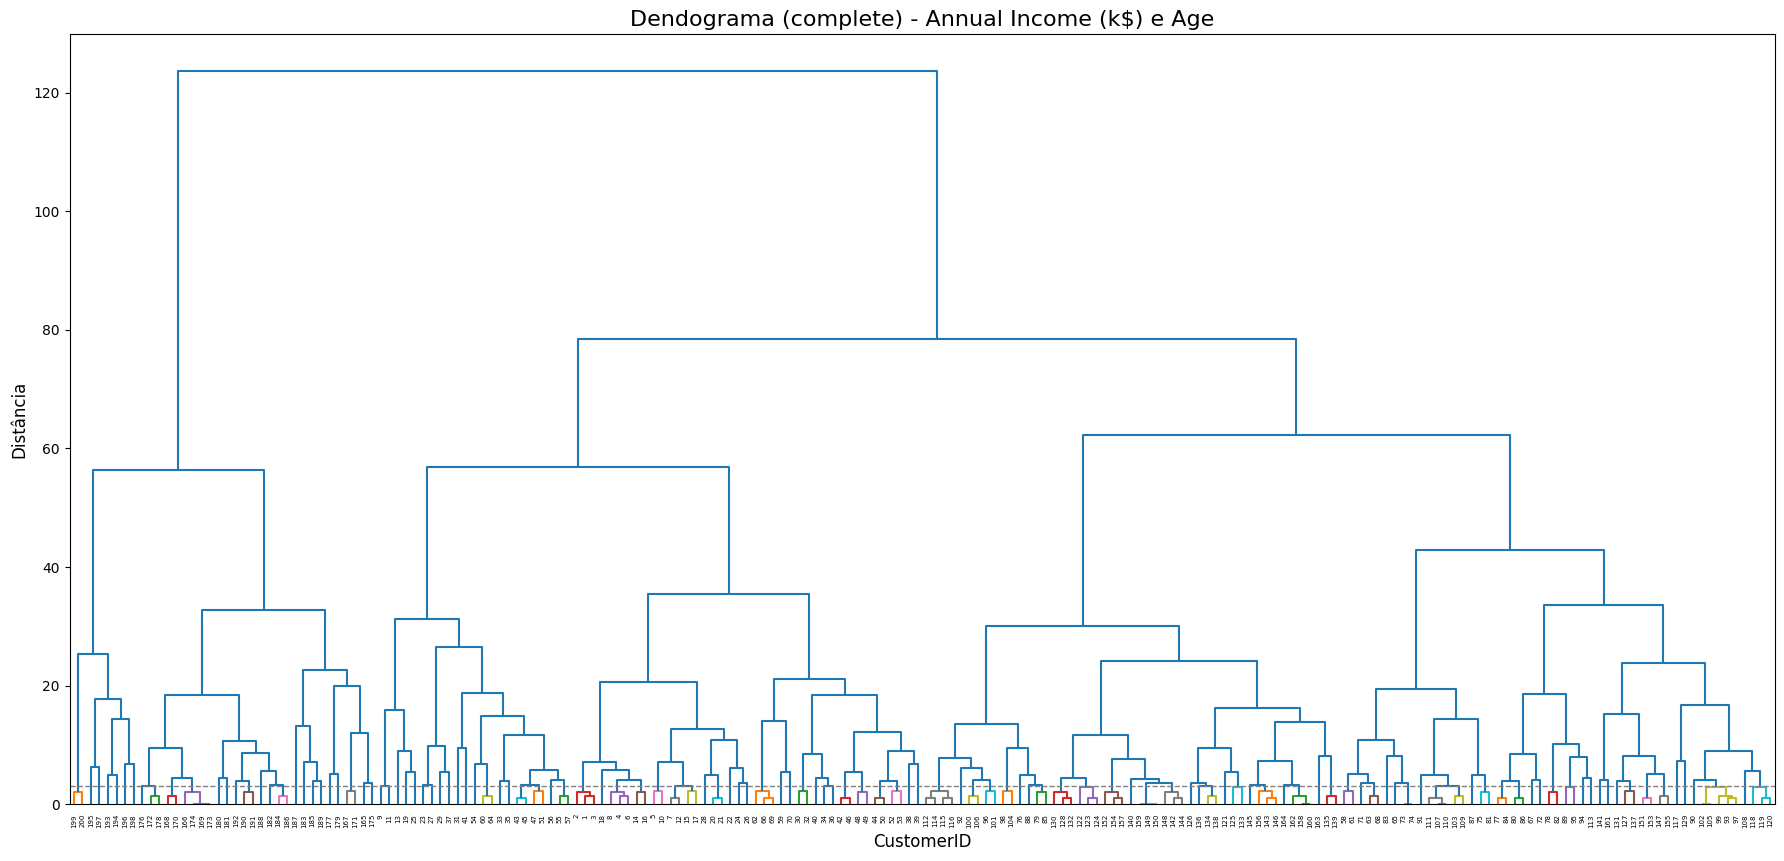

In [ ]:
plt.figure(figsize=(22,10))
# Calculate the distance between each sample
Z3 = linkage(df[['Age', 'Annual Income (k$)']], method='complete', metric='euclidean')
tr3 = 3
# Control number of clusters in the plot + add horizontal line.
dendrogram(Z3, color_threshold=tr3, labels=df.index)
plt.axhline(y=tr3, c='grey', lw=1, linestyle='dashed')
plt.xlabel('CustomerID', fontsize=12)
plt.ylabel('Distância', fontsize=12)
plt.title('Dendograma (complete) - Annual Income (k$) e Age', fontsize=16)

# Show the graph
plt.show()

In [ ]:
clusters3 = fcluster(Z3, t=tr3, criterion='distance')
clusters3.max()

121

Considerando os dados Age e Annual Income, para o mesmo **tr** (3), os métodos de clusterização geraram o seguinte número de clusters.

Método | Nº clusters
-------|------------
single | 83
average | 112
complete | 121

###Age e Spending Score (1-100)

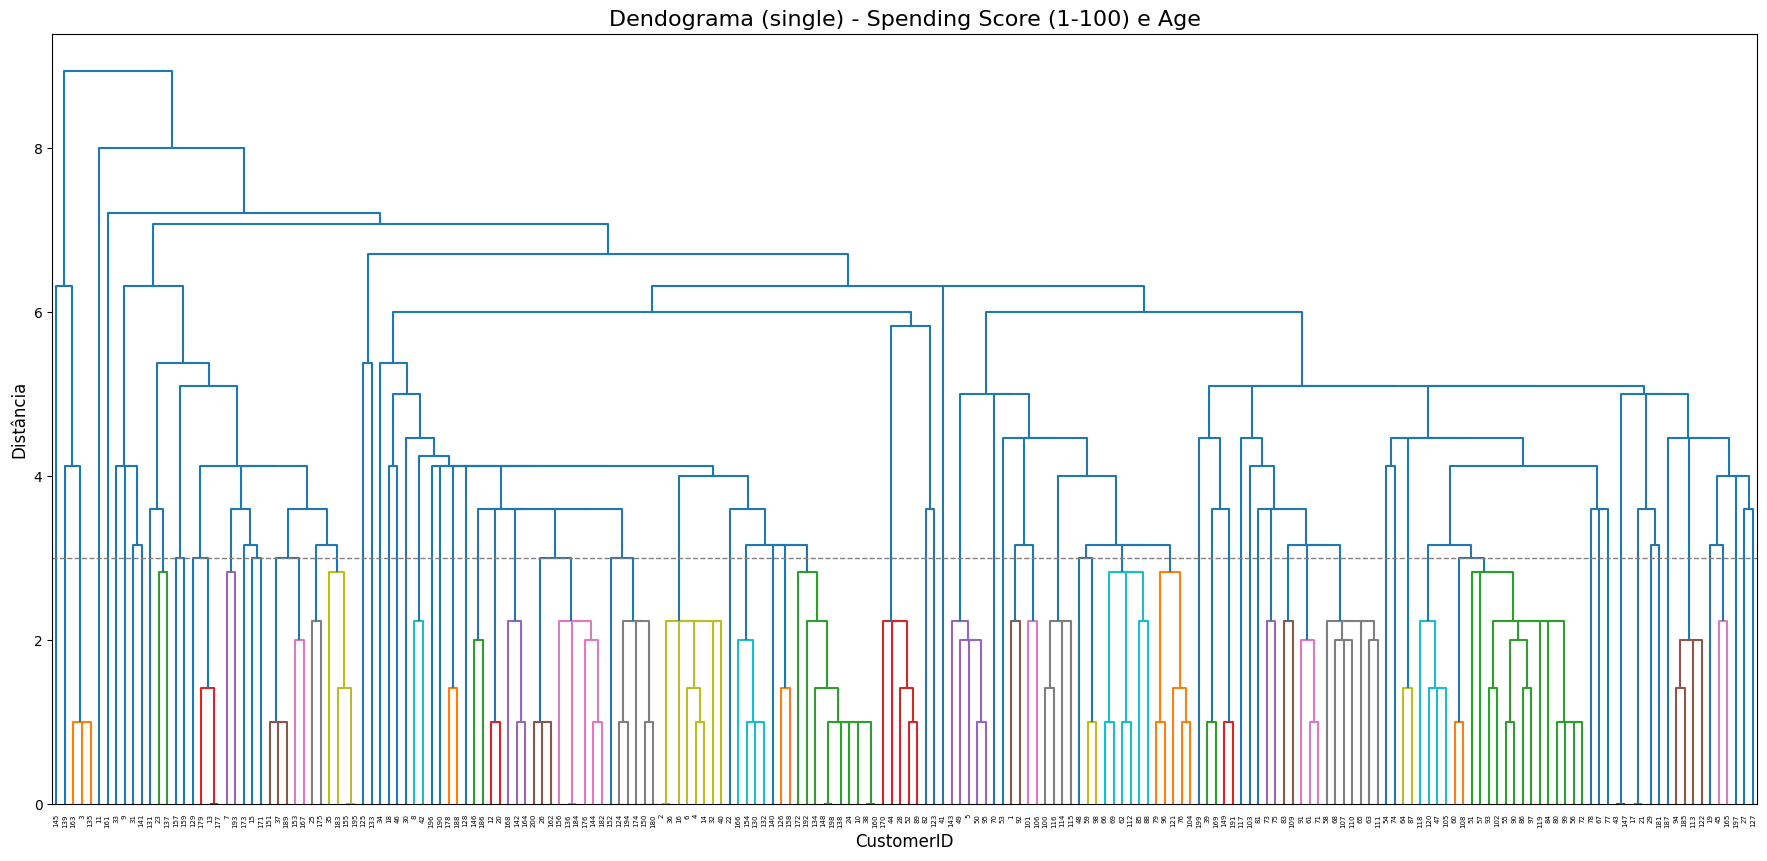

In [ ]:
plt.figure(figsize=(22,10))
# Calculate the distance entre cada amostra
Z5 = single(df[['Age', 'Spending Score (1-100)']])
tr5 = 3
# Control number of clusters in the plot + add horizontal line.
dendrogram(Z5, color_threshold=tr5, labels=df.index)
plt.axhline(y=tr5, c='grey', lw=1, linestyle='dashed')
plt.xlabel('CustomerID', fontsize=12)
plt.ylabel('Distância', fontsize=12)
plt.title('Dendograma (single) - Spending Score (1-100) e Age', fontsize=16)

# Show the graph
plt.show()

In [ ]:
clusters5 = fcluster(Z5, t=tr5, criterion='distance')
clusters5.max()

83

Nessa análise foram gerados 83 clusters.

In [ ]:
df['cluster_id_3'] = clusters5
df.head(10)

,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster_id_1,cluster_id_2,cluster_id_3
CustomerID,,,,,,,
1,Male,19,15,39,44,18,44
2,Male,21,15,81,31,18,29
3,Female,20,16,6,25,18,1
4,Female,23,16,77,29,18,29
5,Female,31,17,40,44,30,43
6,Female,22,17,76,29,18,29
7,Female,35,18,6,25,33,12
8,Female,23,18,94,5,18,22
9,Male,64,19,3,26,15,6


### 30 < Age < 50

In [ ]:
df_idade = df.query('Age > 30 and Age < 50')[['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [ ]:
df_idade.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
5,Female,31,17,40
7,Female,35,18,6
12,Female,35,19,99
15,Male,37,20,13
17,Female,35,21,35


In [ ]:
df_idade.shape

(93, 4)

####Age e Spending Score (1-100)

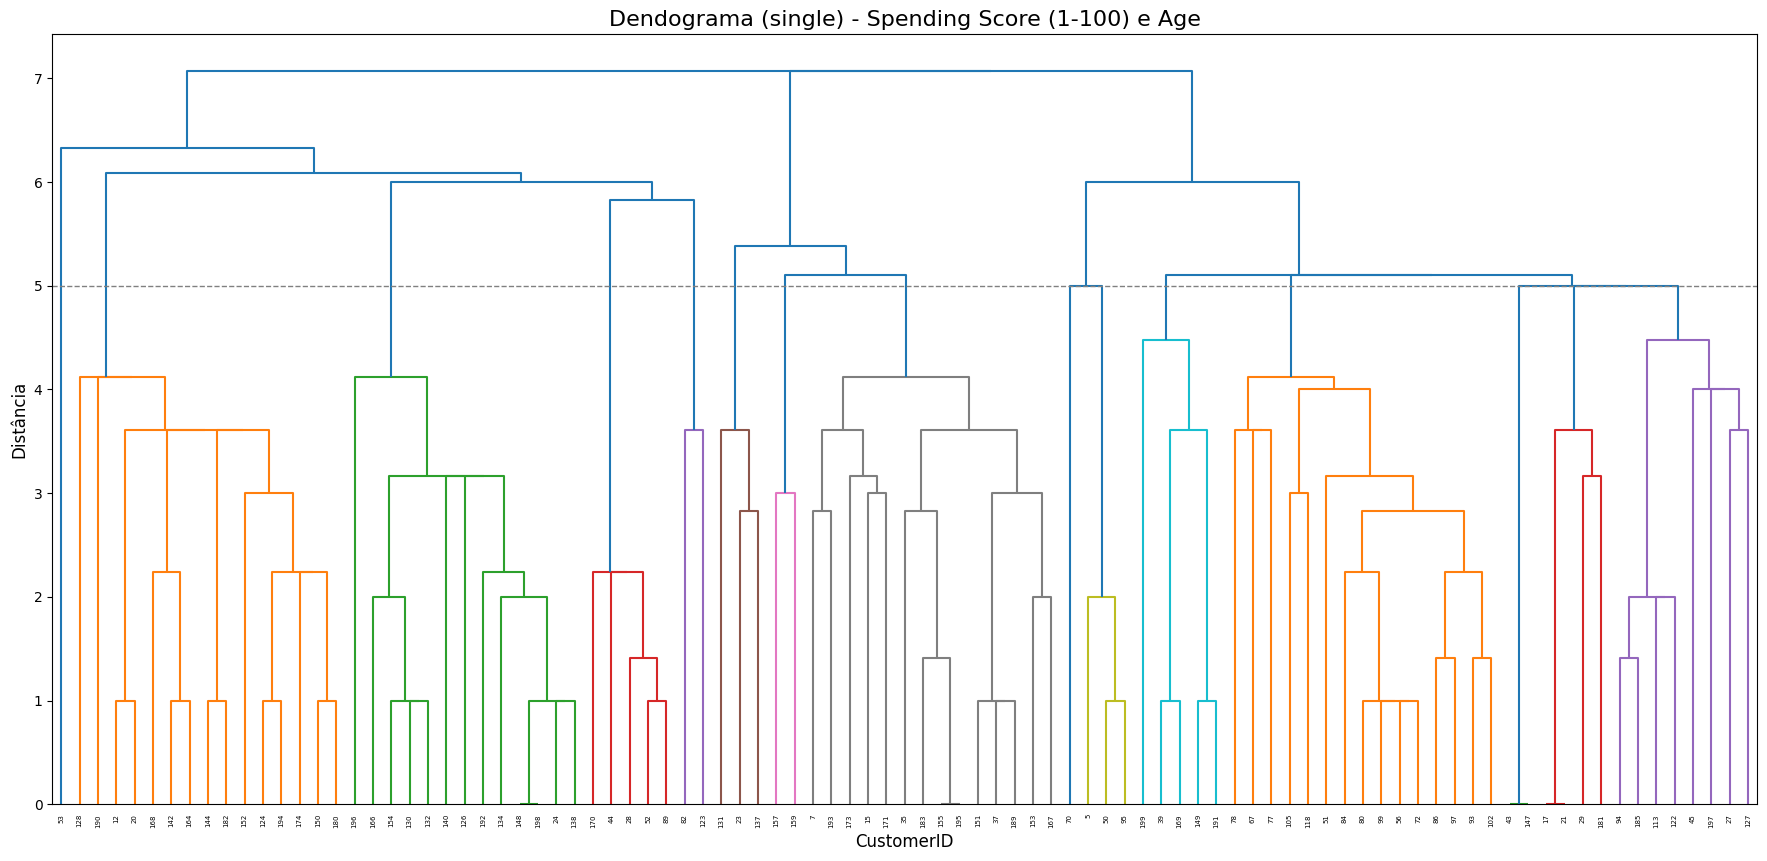

In [ ]:
plt.figure(figsize=(22,10))
# Calculate the distance entre cada amostra
Z4 = single(df_idade[['Age', 'Spending Score (1-100)']])
tr4 = 5
# Control number of clusters in the plot + add horizontal line.
dendrogram(Z4, color_threshold=tr4, labels=df_idade.index)
plt.axhline(y=tr4, c='grey', lw=1, linestyle='dashed')
plt.xlabel('CustomerID', fontsize=12)
plt.ylabel('Distância', fontsize=12)
plt.title('Dendograma (single) - Spending Score (1-100) e Age', fontsize=16)

# Show the graph
plt.show()

In [ ]:
clusters4 = fcluster(Z4, t=tr4, criterion='distance')
clusters4.max()

12

Nessa análise foram gerados 12 clusters.

####Annual Income (k$) e Spending Score (1-100)

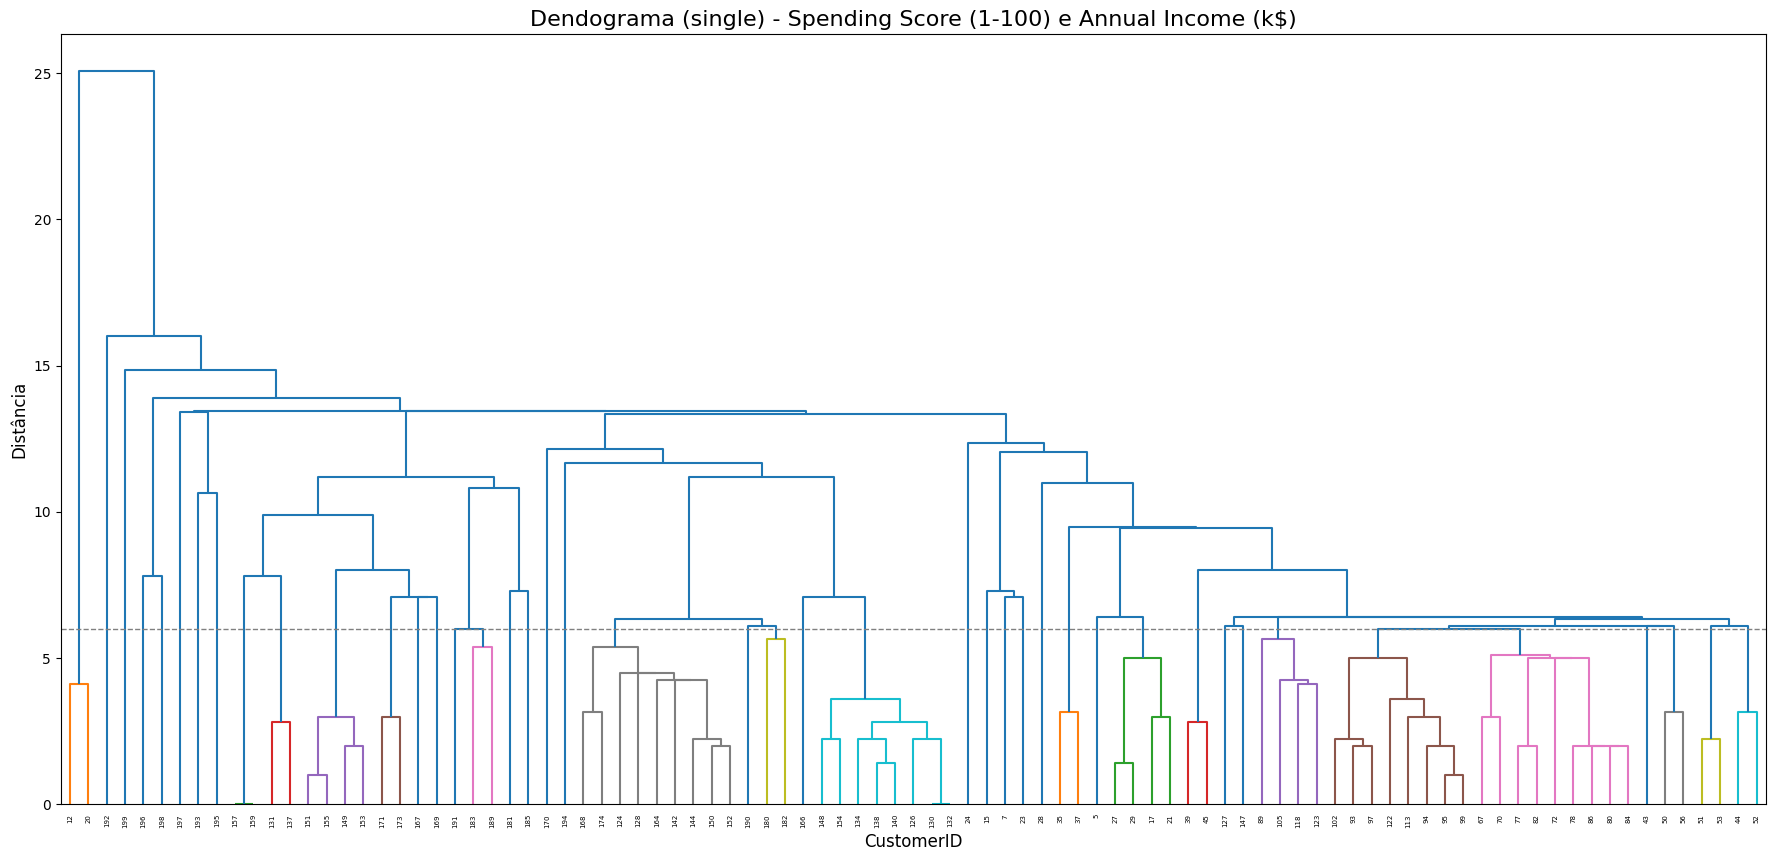

In [ ]:
plt.figure(figsize=(22,10))
# Calculate the distance entre cada amostra
Z6 = single(df_idade[['Annual Income (k$)', 'Spending Score (1-100)']])
tr6 = 6
# Control number of clusters in the plot + add horizontal line.
dendrogram(Z6, color_threshold=tr6, labels=df_idade.index)
plt.axhline(y=tr6, c='grey', lw=1, linestyle='dashed')
plt.xlabel('CustomerID', fontsize=12)
plt.ylabel('Distância', fontsize=12)
plt.title('Dendograma (single) - Spending Score (1-100) e Annual Income (k$)', fontsize=16)

# Show the graph
plt.show()

In [ ]:
clusters6 = fcluster(Z6, t=tr6, criterion='distance')
clusters6.max()

41

Nessa análise foram gerados 41 clusters.